## 数据探索与可视化

### 实验目标
- 学习并掌握如何使用Python进行数据探索与可视化。
- 理解并应用数据探索的基本方法，包括数据清洗、格式化和描述性统计分析。
- 使用Matplotlib和Seaborn等可视化工具，绘制不同类型的图表，分析数据分布及特征之间的关系。
- 利用pandas_profiling生成数据的交互式报告，全面了解数据的分布、缺失值和异常值。

### 实验要求

1. 使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。
2. 使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。
使用describe()方法生成数据的描述性统计信息。
3. 对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。
4. 对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。
5. 使用Matplotlib绘制图表
    - 绘制条形图：展示label列的类别分布。
    - 绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
    - 绘制直方图：展示log_public_repos的对数变换后的数据分布。
    - 绘制散点图：展示public_repos与followers之间的关系。
    - 绘制散点矩阵：展示多个数值型特征之间的成对关系。
6. 使用Seaborn绘制图表
    - 绘制箱线图：展示不同label类别下log_followers的分布。
    - 绘制成对图：展示不同特征之间的成对关系，并根据label分类。
    - 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
    - 绘制小提琴图：展示label与log_followers之间的分布差异。
7. 使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

In [1]:
import pandas as pd

# 读取数据集
df = pd.read_csv('github_bot_processed_data.csv')

# 调整显示选项以查看更多行和列
pd.set_option('display.max_rows', 100)  # 显示最多100行
pd.set_option('display.max_columns', 50)  # 显示最多50列

# 查看数据的前几行
print(df.head())

# 查看数据的基本信息
print(df.info())

   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                                NaN            26   
1  I just press the buttons randomly, and the pro...            30   
2         Time is unimportant,\nonly life important.           103   
3                                                NaN            49   
4                                                NaN            11   

   public_gists  followers  following                 created_at  \
0             1          5          1  2011-09-26 17:27:03+00:00   
1             3          9          6  2015-06

In [2]:
# 查看数据前几行
print(df.head())

# 查看每列的数据类型
print(df.info())

# 生成描述性统计信息
print(df.describe())

   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                                NaN            26   
1  I just press the buttons randomly, and the pro...            30   
2         Time is unimportant,\nonly life important.           103   
3                                                NaN            49   
4                                                NaN            11   

   public_gists  followers  following                 created_at  \
0             1          5          1  2011-09-26 17:27:03+00:00   
1             3          9          6  2015-06

In [5]:
# 格式化日期列，使用ISO8601格式来处理带有时区的日期
df['created_at'] = pd.to_datetime(df['created_at'], format='ISO8601')
df['updated_at'] = pd.to_datetime(df['updated_at'], format='ISO8601')

# 查看格式化后的数据
print(df.head())

   label  type  site_admin  company   blog  location  hireable  \
0  Human  True       False    False  False     False     False   
1  Human  True       False    False   True     False      True   
2  Human  True       False     True   True      True      True   
3    Bot  True       False    False  False      True     False   
4  Human  True       False    False  False     False      True   

                                                 bio  public_repos  \
0                                                NaN            26   
1  I just press the buttons randomly, and the pro...            30   
2         Time is unimportant,\nonly life important.           103   
3                                                NaN            49   
4                                                NaN            11   

   public_gists  followers  following                created_at  \
0             1          5          1 2011-09-26 17:27:03+00:00   
1             3          9          6 2015-06-29

In [6]:
import numpy as np

# 对数变换
df['log_public_repos'] = np.log(df['public_repos'] + 1)
df['log_public_gists'] = np.log(df['public_gists'] + 1)
df['log_followers'] = np.log(df['followers'] + 1)
df['log_following'] = np.log(df['following'] + 1)

# 查看数据变换后的效果
print(df[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].head())

   log_public_repos  log_public_gists  log_followers  log_following
0          3.295837          0.693147       1.791759       0.693147
1          3.433987          1.386294       2.302585       1.945910
2          4.644391          3.912023       7.100852       5.402677
3          3.912023          0.000000       4.442651       1.098612
4          2.484907          0.693147       1.945910       1.098612


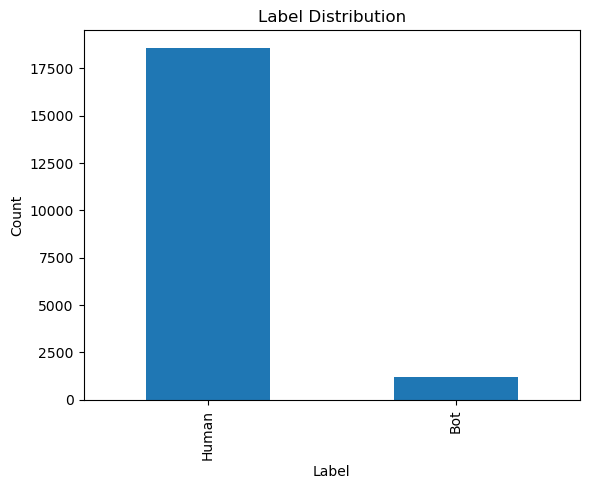

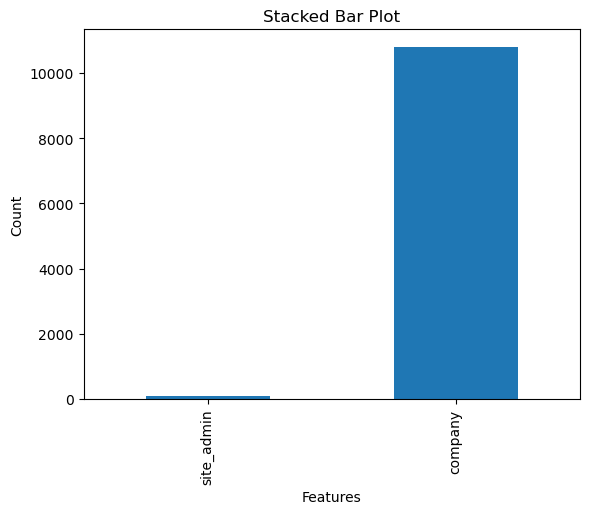

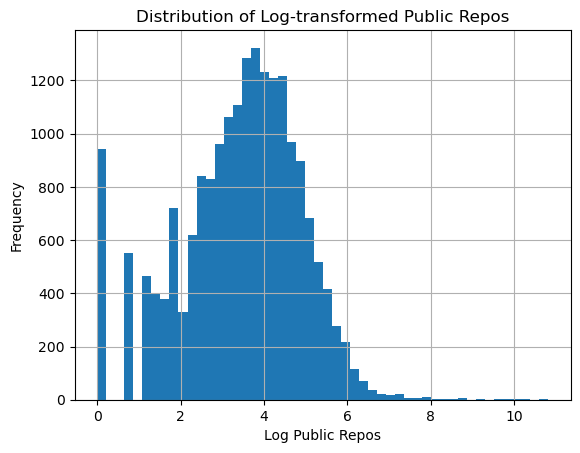

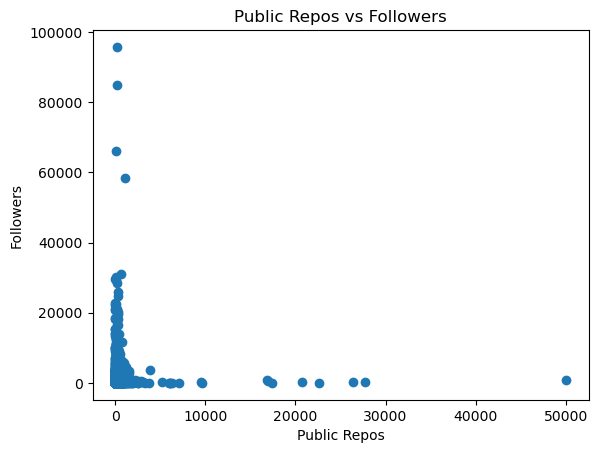

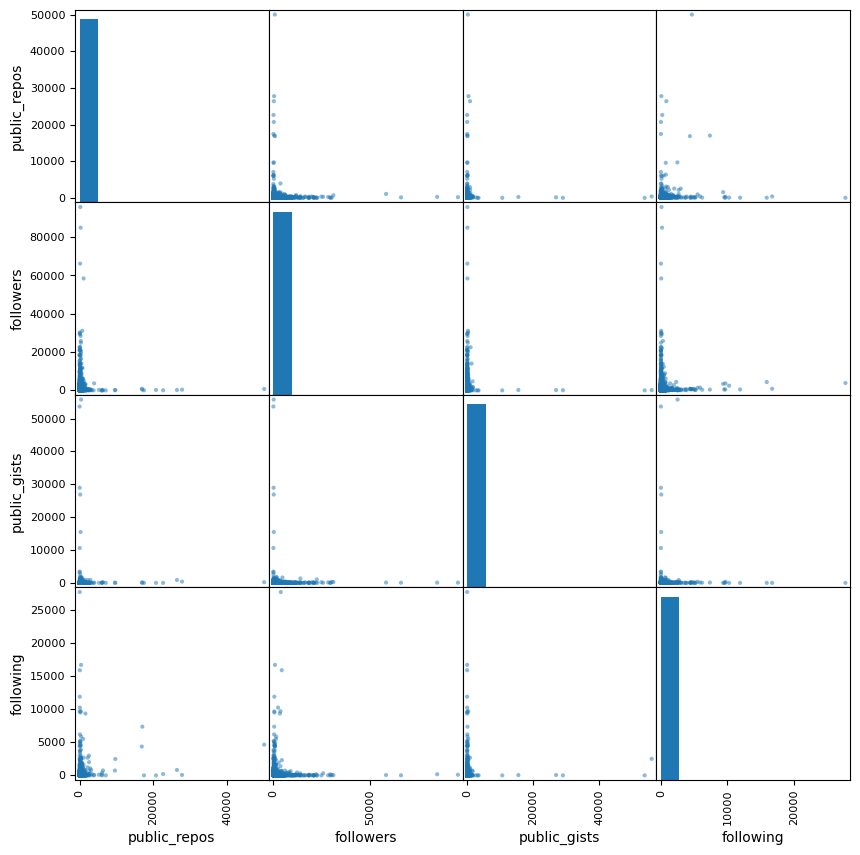

In [7]:
import matplotlib.pyplot as plt

# 绘制条形图：展示label列的类别分布
df['label'].value_counts().plot(kind='bar')
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# 绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布
df[['site_admin', 'company']].sum().plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot')
plt.xlabel('Features')
plt.ylabel('Count')
plt.show()

# 绘制直方图：展示log_public_repos的对数变换后的数据分布
df['log_public_repos'].hist(bins=50)
plt.title('Distribution of Log-transformed Public Repos')
plt.xlabel('Log Public Repos')
plt.ylabel('Frequency')
plt.show()

# 绘制散点图：展示public_repos与followers之间的关系
plt.scatter(df['public_repos'], df['followers'])
plt.title('Public Repos vs Followers')
plt.xlabel('Public Repos')
plt.ylabel('Followers')
plt.show()

# 绘制散点矩阵：展示多个数值型特征之间的成对关系
from pandas.plotting import scatter_matrix

scatter_matrix(df[['public_repos', 'followers', 'public_gists', 'following']], figsize=(10, 10))
plt.show()

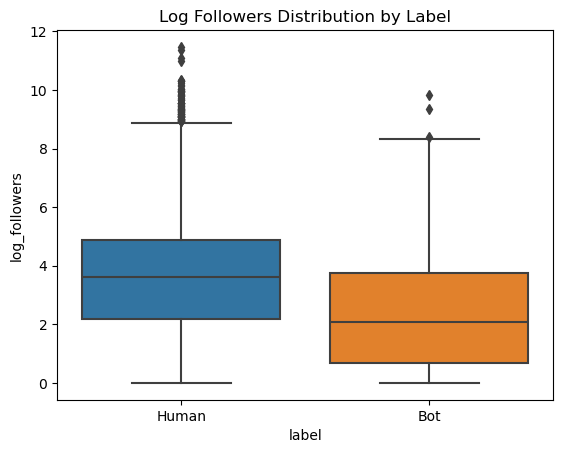

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

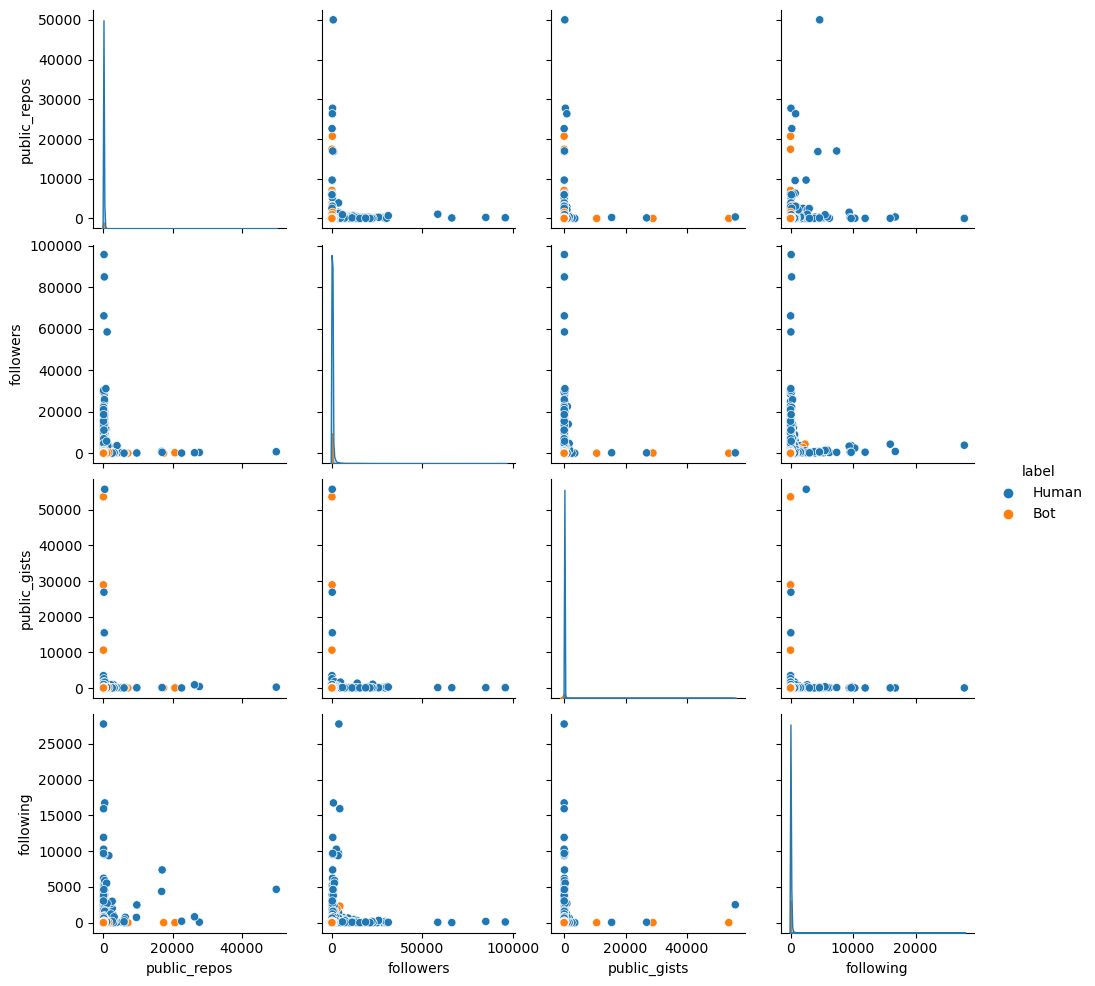

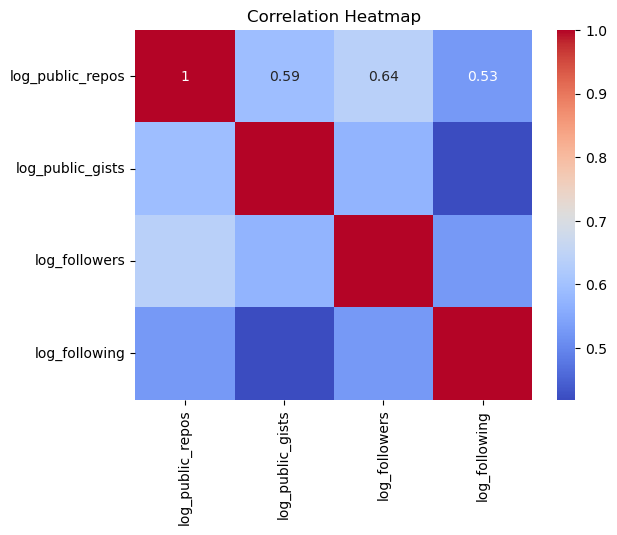

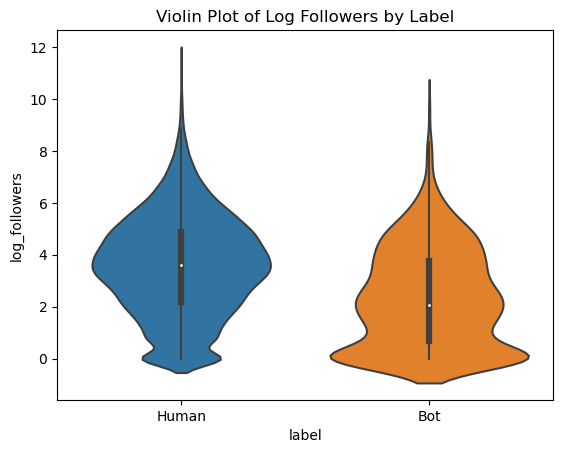

In [8]:
import seaborn as sns

# 绘制箱线图：展示不同label类别下log_followers的分布
sns.boxplot(x='label', y='log_followers', data=df)
plt.title('Log Followers Distribution by Label')
plt.show()

# 绘制成对图：展示不同特征之间的成对关系，并根据label分类
sns.pairplot(df[['public_repos', 'followers', 'public_gists', 'following', 'label']], hue='label')
plt.show()

# 绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性
corr = df[['log_public_repos', 'log_public_gists', 'log_followers', 'log_following']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 绘制小提琴图：展示label与log_followers之间的分布差异
sns.violinplot(x='label', y='log_followers', data=df)
plt.title('Violin Plot of Log Followers by Label')
plt.show()

In [10]:
!pip install pandas-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 5.5 kB/s eta 0:00:00a 0:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 8.8 kB/s eta 0:00:0000:01m0:13m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 6.8 kB/s eta 0:00:00 0:00:02m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 10.8 kB/s eta 0:00:00a 0:00:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.3/657.3 kB 10.1 kB/s eta 0:00:0000:010:03m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.0 kB/s eta 0:00:00a 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=227c3ccecd76329c115f6eac2a54f6bb984d4518ec4d8dc2ccd5300e7a2b2117
  Stored in directory: /Users/calanthe/Library/Caches/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Succ

In [ ]:
from pandas_profiling import ProfileReport

# 生成报告
profile = ProfileReport(df, title="GitHub Bot Data Report", explorative=True)

# 显示报告
profile.to_file("github_bot_data_report.html")